In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os

vacunados = pd.read_csv("D:/Github/05-Procesamiento-de-Señales/analisis-vacunas/data/dataset_total_vacunas.csv")
vacunados['FECHA_ADMINISTRACION'] = pd.to_datetime(vacunados['FECHA_ADMINISTRACION'], format='%d%b%Y:%H:%M:%S')

type(vacunados)
print(len(vacunados))
pd.set_option("display.max.columns", None)
vacunados.head()

6387


,FECHA_ADMINISTRACION,GRUPO_ETARIO,GENERO,VACUNA,TIPO_EFECTOR,DOSIS_1,DOSIS_2,ID_CARGA
0,2021-02-24,31 a 40,F,AstraZeneca,Privado,1,0,NaN
1,2021-02-24,31 a 40,F,AstraZeneca,Público,12,0,NaN
2,2021-02-24,31 a 40,F,Sputnik,Privado,259,77,NaN
3,2021-02-24,31 a 40,F,Sputnik,Público,497,151,NaN
4,2021-02-24,31 a 40,F,Sputnik,Público nacional,38,19,NaN


In [6]:
print(min(vacunados["FECHA_ADMINISTRACION"]))
print(max(vacunados["FECHA_ADMINISTRACION"]))

2020-12-29 00:00:00
2021-05-12 00:00:00


In [7]:
groupVacuna = vacunados.groupby('VACUNA')
groupVacuna.describe()

DOSIS_1                                                         \
              count        mean         std  min  25%   50%   75%      max   
VACUNA                                                                       
AstraZeneca  1350.0  107.742222  460.397836  0.0  2.0   8.0  40.0  10281.0   
Sinopharm    1123.0  114.460374  457.707193  0.0  1.0   6.0  54.5   7033.0   
Sputnik      3914.0  111.089934  523.725524  0.0  1.0  10.0  50.0  10905.0   

            DOSIS_2                                                      \
              count       mean         std  min  25%  50%   75%     max   
VACUNA                                                                    
AstraZeneca  1350.0   0.130370    0.702138  0.0  0.0  0.0   0.0    16.0   
Sinopharm    1123.0  90.565450  532.236721  0.0  0.0  0.0   0.0  8004.0   
Sputnik      3914.0  27.212059   89.893403  0.0  0.0  2.0  19.0  2371.0   

            ID_CARGA                               
               count mean std min 25% 50% 75% max  
VACUNA                                             
AstraZeneca      0.0  NaN NaN NaN NaN NaN NaN NaN  
Sinopharm        0.0  NaN NaN NaN NaN NaN NaN NaN  
Sputnik          0.0  NaN NaN NaN NaN NaN NaN NaN

<AxesSubplot:xlabel='VACUNA'>

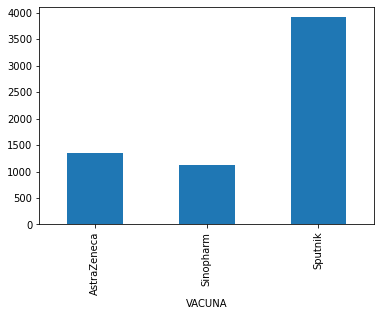

In [8]:
vacunasCount = groupVacuna["FECHA_ADMINISTRACION"].count()
vacunasCount.plot(kind="bar")

In [9]:
vacunasEdadesCount = vacunados.groupby("GRUPO_ETARIO")["FECHA_ADMINISTRACION"].count()
vacunasEdadesCount

GRUPO_ETARIO
30 o menos    845
31 a 40       918
41 a 50       903
51 a 60       935
61 a 70       856
71 a 80       776
81 a 90       640
91 o mas      514
Name: FECHA_ADMINISTRACION, dtype: int64

<AxesSubplot:xlabel='GRUPO_ETARIO'>

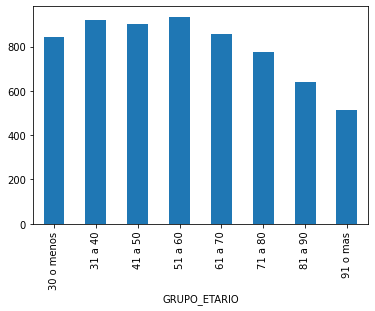

In [10]:
vacunasEdadesCount.plot(kind="bar")

In [11]:
groupGenero = vacunados.groupby('GENERO')
groupGenero.describe()

DOSIS_1                                                        DOSIS_2  \
         count        mean         std  min  25%   50%   75%      max   count   
GENERO                                                                          
F       3267.0  137.889807  569.382667  0.0  2.0  11.0  64.0  10905.0  3267.0   
M       3120.0   82.791987  412.471565  0.0  1.0   8.0  37.0   8714.0  3120.0   

                                                          ID_CARGA           \
             mean         std  min  25%  50%  75%     max    count mean std   
GENERO                                                                        
F       43.299969  290.899070  0.0  0.0  0.0  9.0  8004.0      0.0  NaN NaN   
M       21.451282  157.762209  0.0  0.0  0.0  6.0  5664.0      0.0  NaN NaN   

                            
       min 25% 50% 75% max  
GENERO                      
F      NaN NaN NaN NaN NaN  
M      NaN NaN NaN NaN NaN

Text(0.5, 0, 'Edad')

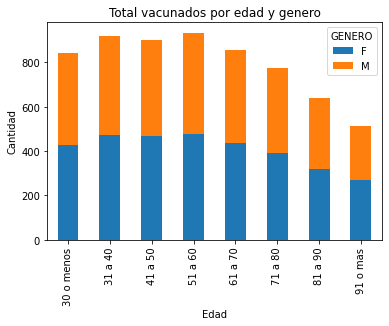

In [12]:
by_edad_sexo = vacunados.groupby(["GRUPO_ETARIO", "GENERO"])
edad_sexo_count = by_edad_sexo["FECHA_ADMINISTRACION"].count()
edadSexo_unstacked = edad_sexo_count.unstack()
s_plot = edadSexo_unstacked.plot(kind='bar', stacked=True, title="Total vacunados por edad y genero")
s_plot.set_ylabel("Cantidad")
s_plot.set_xlabel("Edad")

In [14]:
groupFechaCount = vacunados.groupby(["FECHA_ADMINISTRACION"])["GRUPO_ETARIO"].count()
groupFechaCount

FECHA_ADMINISTRACION
2020-12-29    10
2020-12-30    11
2020-12-31     9
2021-01-02    11
2021-01-03     8
              ..
2021-05-08    43
2021-05-09    11
2021-05-10    75
2021-05-11    72
2021-05-12    68
Name: GRUPO_ETARIO, Length: 133, dtype: int64

<AxesSubplot:xlabel='FECHA_ADMINISTRACION'>

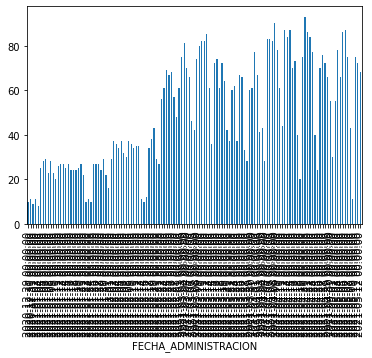

In [15]:
groupFechaCount.plot(kind="bar")